In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

In [2]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_res/pseudo"
HYAK_OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"

SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

In [6]:
reg_vals = ["1e-05", "0.0001", "0.001", "0.01", "0.1", "0.5", "1.0"]

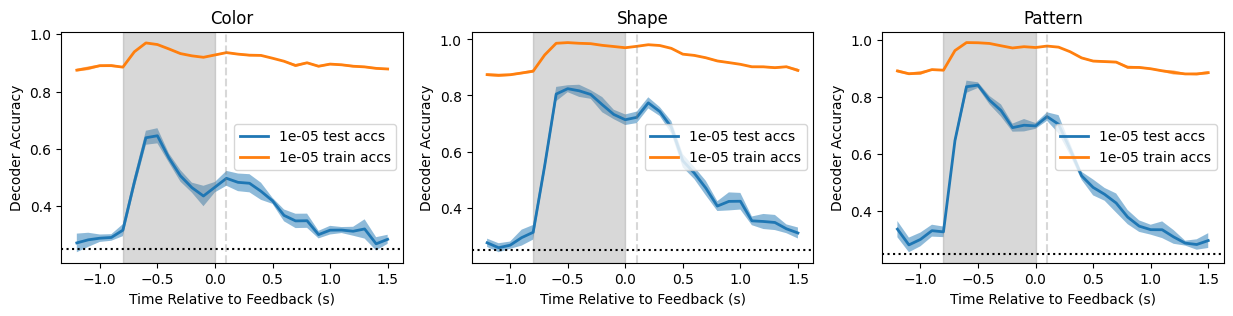

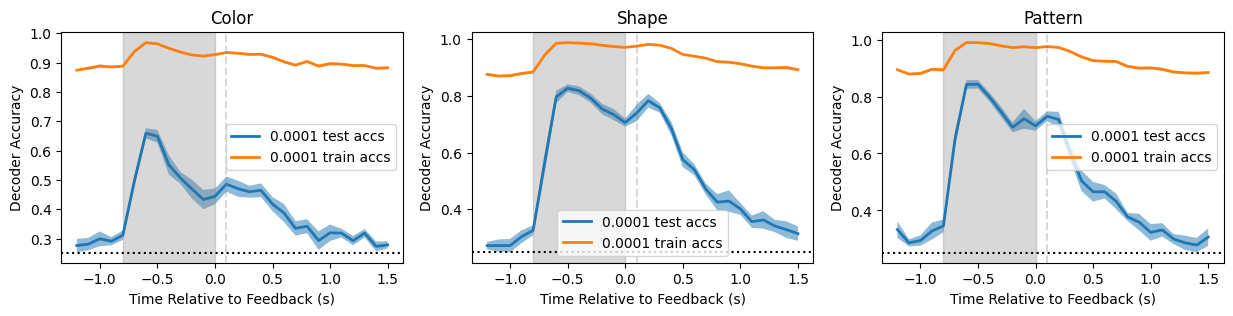

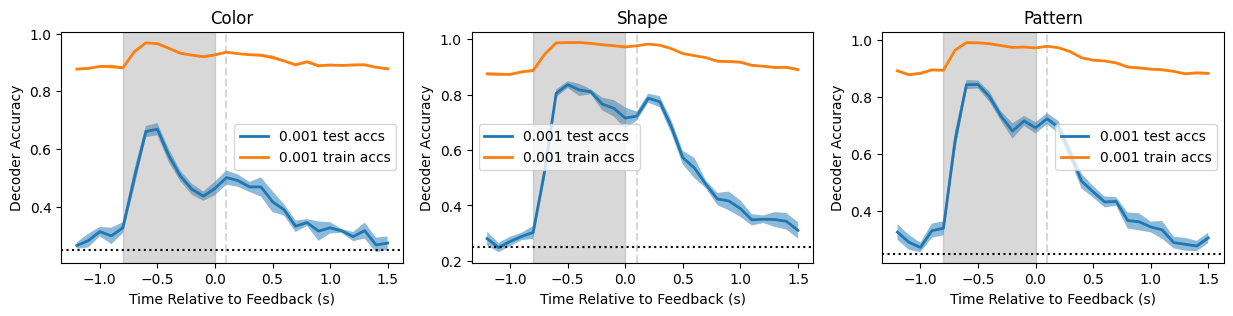

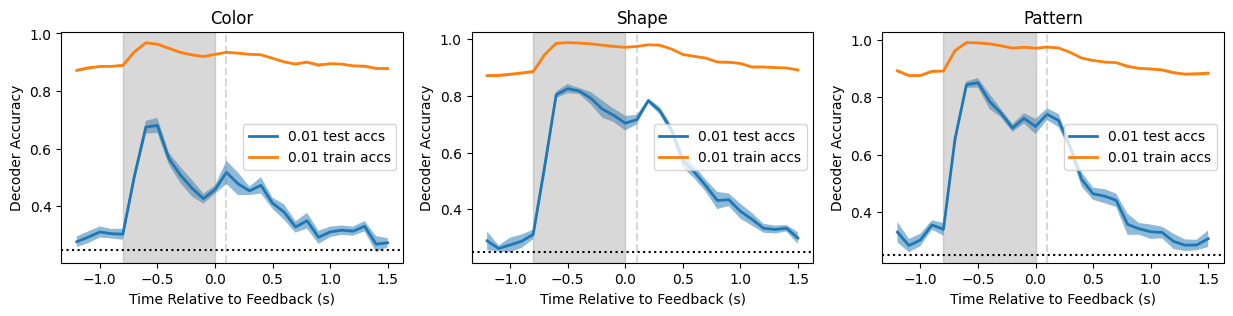

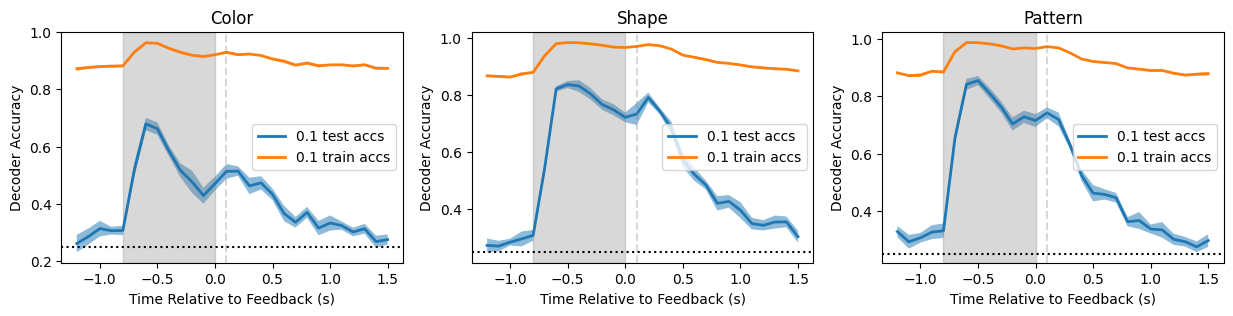

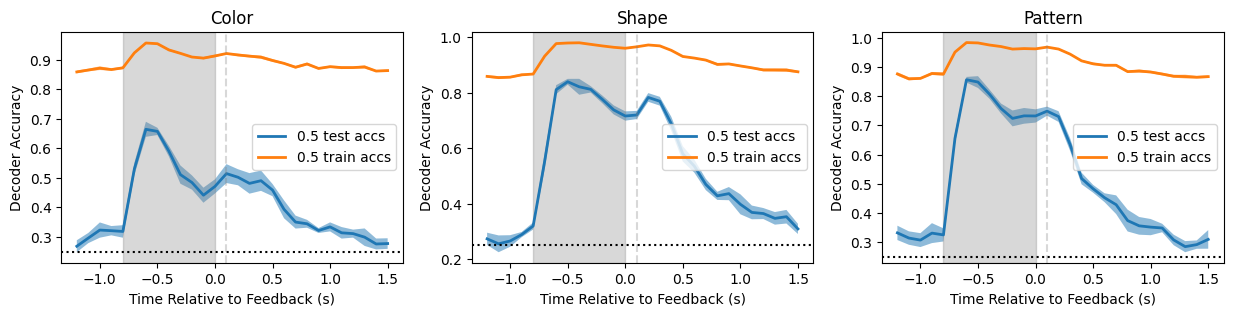

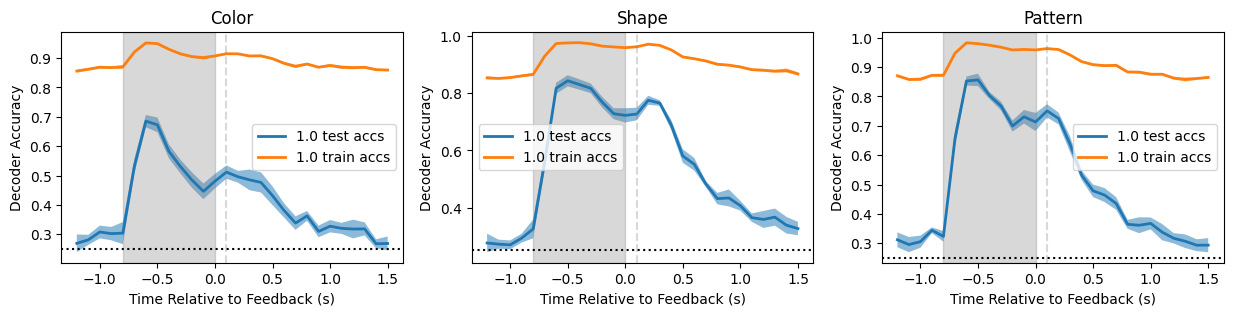

In [8]:
for reg in reg_vals:
    fig, axs = plt.subplots(1, 3, figsize=(15, 3))
    for i, feature_dim in enumerate(FEATURE_DIMS):
        ax = axs[i]
        test_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_all_all_no_proj_{reg}_test_accs.npy"))
        train_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"{feature_dim}_baseline_all_all_no_proj_{reg}_train_accs.npy"))
        visualization_utils.visualize_accuracy_across_time_bins(
            test_accs,
            PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
            ax,
            label=f"{reg} test accs",
            right_align=True, 
        )
        visualization_utils.visualize_accuracy_across_time_bins(
            train_accs,
            PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
            ax,
            label=f"{reg} train accs",
            right_align=True, 
        )
        ax.legend()
        # add grey band for selection period
        ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
        # add dotted line for feedback start
        ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
        # add estimated chance
        ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
        ax.set_xlabel("Time Relative to Feedback (s)")
        ax.set_ylabel("Decoder Accuracy")
        ax.set_title(feature_dim)